In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import zipfile

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/facial-keypoints-detection/training.zip
/kaggle/input/facial-keypoints-detection/SampleSubmission.csv
/kaggle/input/facial-keypoints-detection/IdLookupTable.csv
/kaggle/input/facial-keypoints-detection/test.zip


In [33]:
training_zip_file_path = '/kaggle/input/facial-keypoints-detection/training.zip'
test_zip_file_path = '/kaggle/input/facial-keypoints-detection/test.zip'

with zipfile.ZipFile(training_zip_file_path , 'r') as zip_ref:
    zip_ref.extractall('/kaggle/working/') 

with zipfile.ZipFile(test_zip_file_path , 'r') as zip_ref:
    zip_ref.extractall('/kaggle/working/')

In [34]:
# List files in the extracted directory
for root, dirs, files in os.walk('/kaggle/working/'):
    for file in files:
        print(os.path.join(root, file))

/kaggle/working/test.csv
/kaggle/working/training.csv


In [35]:
train_file_path = os.path.join('/kaggle/working/' , 'training.csv')
test_file_path = os.path.join('/kaggle/working/' , 'test.csv')

In [36]:
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)
train_data

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,67.402546,31.842551,29.746749,38.632942,NaN,NaN,NaN,NaN,NaN,NaN,...,67.029093,NaN,NaN,NaN,NaN,NaN,NaN,50.426637,79.683921,71 74 85 105 116 128 139 150 170 187 201 209 2...
7045,66.134400,38.365501,30.478626,39.950198,NaN,NaN,NaN,NaN,NaN,NaN,...,66.626011,NaN,NaN,NaN,NaN,NaN,NaN,50.287397,77.983023,60 60 62 57 55 51 49 48 50 53 56 56 106 89 77 ...
7046,66.690732,36.845221,31.666420,39.685042,NaN,NaN,NaN,NaN,NaN,NaN,...,67.515161,NaN,NaN,NaN,NaN,NaN,NaN,49.462572,78.117120,74 74 74 78 79 79 79 81 77 78 80 73 72 81 77 1...
7047,70.965082,39.853666,30.543285,40.772339,NaN,NaN,NaN,NaN,NaN,NaN,...,66.724988,NaN,NaN,NaN,NaN,NaN,NaN,50.065186,79.586447,254 254 254 254 254 238 193 145 121 118 119 10...


In [37]:
train_data[ 'Image']

0       238 236 237 238 240 240 239 241 241 243 240 23...
1       219 215 204 196 204 211 212 200 180 168 178 19...
2       144 142 159 180 188 188 184 180 167 132 84 59 ...
3       193 192 193 194 194 194 193 192 168 111 50 12 ...
4       147 148 160 196 215 214 216 217 219 220 206 18...
                              ...                        
7044    71 74 85 105 116 128 139 150 170 187 201 209 2...
7045    60 60 62 57 55 51 49 48 50 53 56 56 106 89 77 ...
7046    74 74 74 78 79 79 79 81 77 78 80 73 72 81 77 1...
7047    254 254 254 254 254 238 193 145 121 118 119 10...
7048    53 62 67 76 86 91 97 105 105 106 107 108 112 1...
Name: Image, Length: 7049, dtype: object

In [38]:
def reshape_image(image_str):
    pixel_values_list = list(map(int , image_str.split()))
    height , width  = 96 , 96 
    img_array = np.array(pixel_values_list).reshape((height , width ))
    return img_array
    

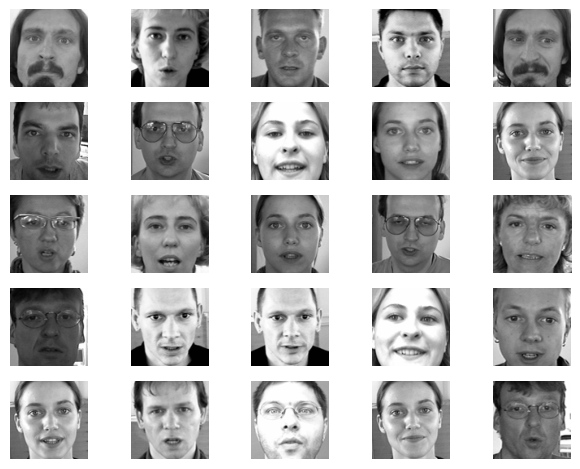

In [39]:
import matplotlib.pyplot as plt
from PIL import Image
fig ,ax = plt.subplots(5 , 5)
k = 0
for i in range(5):
    for j in range(5):
        pixel_values_str = train_data.loc[k, 'Image']
        img_array  = reshape_image(pixel_values_str)
        ax[i,j].imshow(img_array , cmap='gray')
        ax[i,j].axis('off')
        k += 1
plt.tight_layout()        
plt.show()
    


In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [41]:
train_data.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [42]:
print(train_data[train_data.columns[0]])

0       66.033564
1       64.332936
2       65.057053
3       65.225739
4       66.725301
          ...    
7044    67.402546
7045    66.134400
7046    66.690732
7047    70.965082
7048    66.938311
Name: left_eye_center_x, Length: 7049, dtype: float64


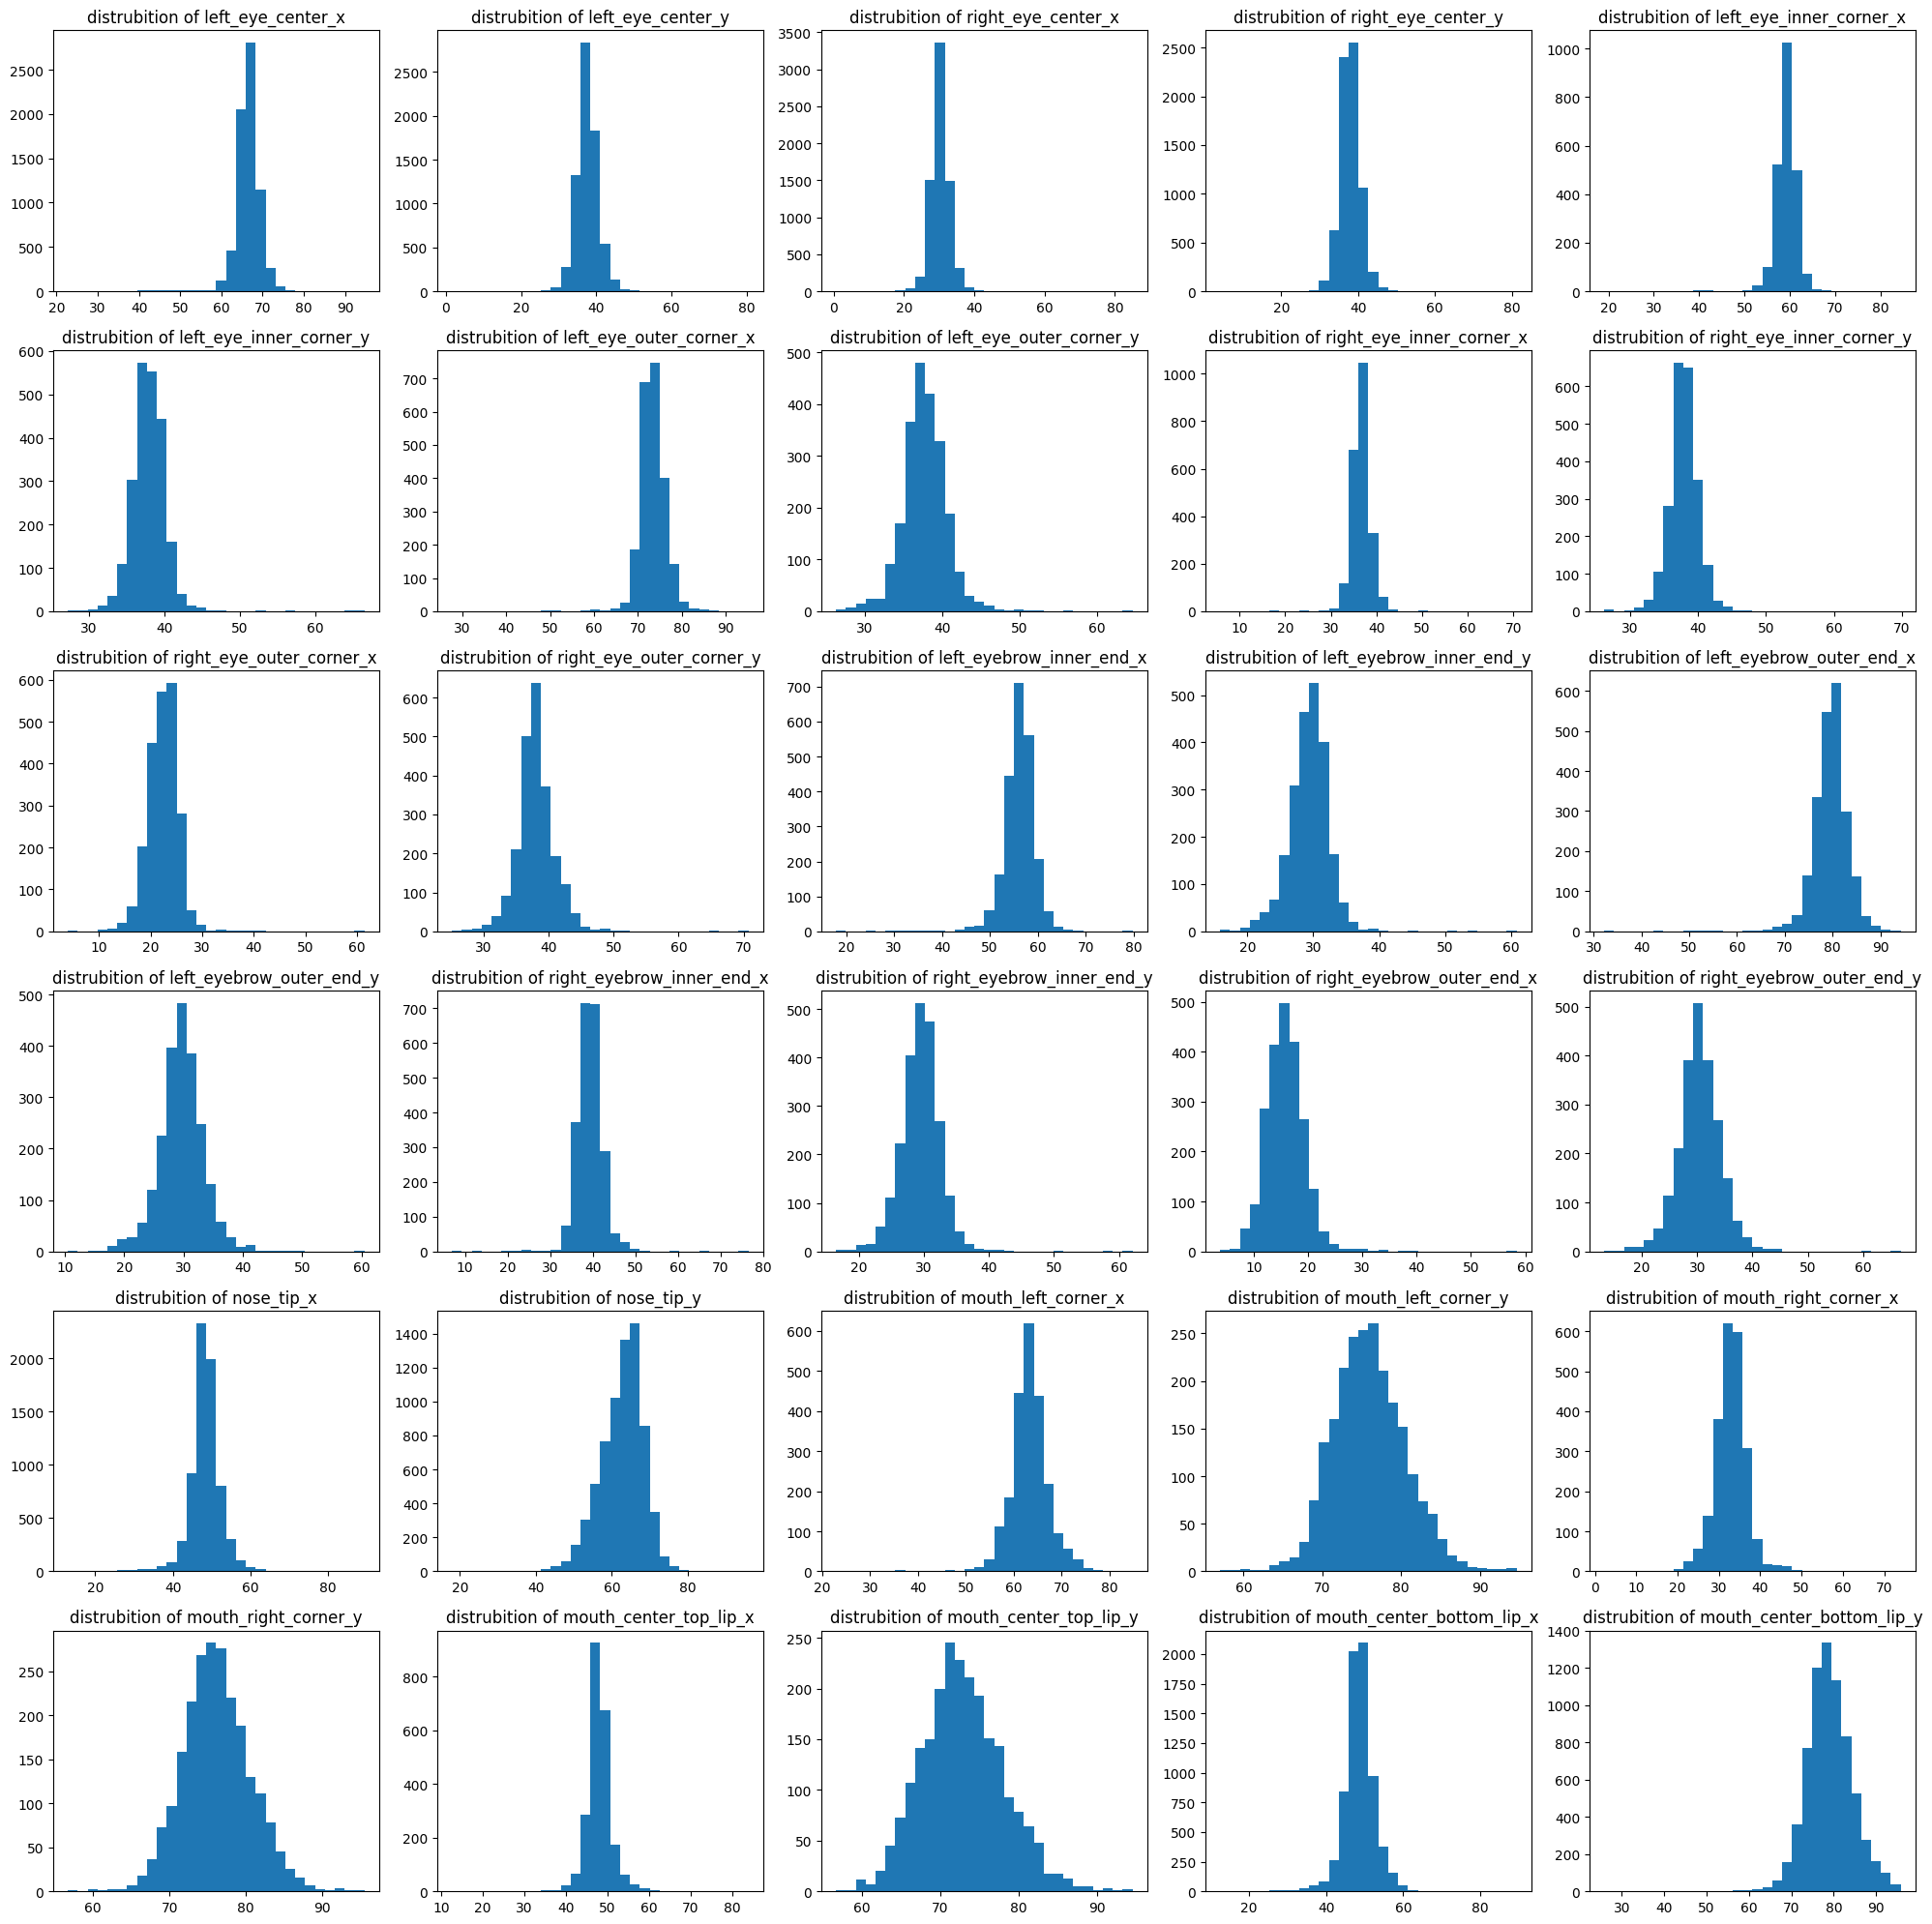

In [43]:
# lets visualize the distrubition of the outputs in order to fill the null values
fig , ax = plt.subplots(6 , 5 , figsize=(20 , 20))
k = 0
for i in range(6):
    for j in range(5):
        if k==30:
            break
        ax[i , j].hist(train_data[train_data.columns[k]] , bins=30)
        ax[i , j].set_title(f'distrubition of {train_data.columns[k]}')
        k += 1
plt.tight_layout()
plt.show()

In [44]:
for column in train_data.columns:
    train_data[column].fillna(train_data[column].mode()[0] , inplace=True)
train_data.head()

/tmp/ipykernel_33/849225222.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[column].fillna(train_data[column].mode()[0] , inplace=True)


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [45]:
train_data.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [46]:
# reshape all the images
def reshape_images(series):
    reshaped_images = []
    for image_str in series:
        pixel_values_list = list(map(int, image_str.split()))
        img_array = np.array(pixel_values_list).reshape((96, 96))  # Replace with actual dimensions
        reshaped_images.append(img_array)
    return reshaped_images

In [47]:
x_train = reshape_images(train_data['Image'])


In [48]:
y_train = []
training_labels = train_data.drop('Image' , axis=1)
for i in range(7049):
    y_train.append(training_labels.iloc[i,:])
y_train = np.array(y_train ,dtype='float')
y_train[0]

array([66.03356391, 39.00227368, 30.22700752, 36.4216782 , 59.58207519,
       39.64742256, 73.13034586, 39.96999699, 36.35657143, 37.3894015 ,
       23.45287218, 37.3894015 , 56.95326316, 29.03364812, 80.22712782,
       32.22813835, 40.22760902, 29.0023218 , 16.35637895, 29.64747068,
       44.42057143, 57.06680301, 61.19530827, 79.97016541, 28.61449624,
       77.38899248, 43.3126015 , 72.93545865, 43.13070677, 84.48577444])

In [49]:
x_train = [img / 255.0 for img in x_train]

In [50]:
#create the model
import tensorflow as tf
import keras
from keras import layers
from keras.layers import Dense , Conv2D , Input , MaxPooling2D , Flatten , Dropout , BatchNormalization
from keras.models import Sequential


model = Sequential([
  Conv2D(32 , kernel_size=(3,3) ,  activation='relu' , input_shape=(96,96,1)),
  BatchNormalization(),
  MaxPooling2D(pool_size=(2,2)),
  Dropout(0.25),
  
  Conv2D(64 , kernel_size=(3,3) , activation='relu'),
  BatchNormalization(),
  MaxPooling2D(pool_size=(2,2)),
  Dropout(0.25),
  
  Conv2D(128 , kernel_size=(3,3) , activation='relu'),
  BatchNormalization(),
  MaxPooling2D(pool_size=(2,2)),
  Dropout(0.25),
  
  Flatten(),
  Dense(256 , activation='relu'),
  BatchNormalization(),
  Dropout(0.5),
  
  Dense(30)    
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
model.compile(
optimizer = keras.optimizers.Adam(learning_rate=1e-3),
loss=keras.losses.mean_squared_error,
metrics=['mae'])

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
callback = keras.callbacks.EarlyStopping(monitor='loss' , patience=5 , restore_best_weights=True)

datagen = ImageDataGenerator(
    rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=False,
        fill_mode='nearest'
)


In [53]:
x_train = np.array(x_train)
x_train = np.expand_dims(x_train, axis=-1)
y_train = np.array(y_train)
# Verify the shape
print(x_train.shape) 

(7049, 96, 96, 1)


In [55]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)


In [59]:
model.fit(datagen.flow(x_train , y_train , batch_size=32)  , epochs=30  , validation_data=(x_val , y_val) , callbacks=[callback])

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


177/177 ━━━━━━━━━━━━━━━━━━━━ 78s 418ms/step - loss: 2453.0012 - mae: 46.0107 - val_loss: 2090.4502 - val_mae: 42.0522
Epoch 2/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 75s 420ms/step - loss: 1519.0765 - mae: 34.2436 - val_loss: 468.4996 - val_mae: 16.5178
Epoch 3/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 78s 436ms/step - loss: 253.4397 - mae: 11.3813 - val_loss: 36.4860 - val_mae: 4.0934
Epoch 4/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 78s 441ms/step - loss: 53.3138 - mae: 5.3209 - val_loss: 10.4182 - val_mae: 2.1593
Epoch 5/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 75s 423ms/step - loss: 45.0560 - mae: 4.9307 - val_loss: 10.1320 - val_mae: 2.1378
Epoch 6/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 79s 407ms/step - loss: 40.9256 - mae: 4.6356 - val_loss: 9.7291 - val_mae: 2.0199
Epoch 7/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 72s 405ms/step - loss: 38.4902 - mae: 4.5765 - val_loss: 9.4192 - val_mae: 2.0030
Epoch 8/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 72s 404ms/step - loss: 37.7530 - mae: 4.4829 - val_loss: 9.4026 - val_mae: 2.0417
Epoch 9/30
177/17

In [60]:
test_data

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...
...,...,...
1778,1779,101 101 101 100 100 97 97 98 102 149 214 206 1...
1779,1780,201 191 171 158 145 140 136 130 123 115 108 10...
1780,1781,28 28 29 30 31 32 33 34 39 44 46 46 49 54 61 7...
1781,1782,104 95 71 57 46 52 65 70 70 67 76 72 69 69 72 ...


In [61]:
x_test = reshape_images(test_data['Image'])
x_test = [img / 255.0 for img in x_test]
x_test = np.array(x_test)
x_test = np.expand_dims(x_test, axis=-1)
# Verify the shape
print(x_test.shape)


(1783, 96, 96, 1)


In [62]:
predictions = model.predict(x_test)

56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step


In [69]:
len(predictions[1782])

30

In [71]:
lookid_data = pd.read_csv("/kaggle/input/facial-keypoints-detection/IdLookupTable.csv")
lookid_data

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN
...,...,...,...,...
27119,27120,1783,right_eye_center_y,NaN
27120,27121,1783,nose_tip_x,NaN
27121,27122,1783,nose_tip_y,NaN
27122,27123,1783,mouth_center_bottom_lip_x,NaN


In [73]:
lookid_list = list(lookid_data['FeatureName'])
imageID = list(lookid_data['ImageId']-1)
pre_list = list(predictions)
rowid = lookid_data['RowId']
rowid=list(rowid)
feature = []
for f in list(lookid_data['FeatureName']):
    feature.append(lookid_list.index(f))
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])
rowid = pd.Series(rowid,name = 'RowId')
loc = pd.Series(preded,name = 'Location')
submission = pd.concat([rowid,loc],axis = 1)
submission.to_csv('face_key_detection_submission.csv',index = False)